In [10]:
from datetime import datetime, timedelta, date
import pandas as pd
from constants import *
from download import query_phe as query, download_phe as download
from phe import plot_summary, read_csv

In [12]:
release=None

In [13]:
overview_data = query(
    filters={area_type: overview},
    structure=[release_timestamp, date_col, area_name, area_code,
               new_cases_by_specimen_date, new_admissions, new_deaths_by_death_date,
               new_virus_tests]
)
overview_data

,releaseTimestamp,date,areaName,areaCode,newCasesBySpecimenDate,newAdmissions,newDeaths28DaysByDeathDate,newVirusTests
0,2020-12-31,2020-12-30,United Kingdom,K02000001,5235,NaN,154.0,420492.0
1,2020-12-31,2020-12-29,United Kingdom,K02000001,44026,NaN,434.0,344775.0
2,2020-12-31,2020-12-28,United Kingdom,K02000001,38761,NaN,475.0,357238.0
3,2020-12-31,2020-12-27,United Kingdom,K02000001,44998,NaN,479.0,352702.0
4,2020-12-31,2020-12-26,United Kingdom,K02000001,39064,NaN,490.0,269876.0
...,...,...,...,...,...,...,...,...
350,2020-12-31,2020-01-15,United Kingdom,K02000001,0,NaN,NaN,NaN
351,2020-12-31,2020-01-14,United Kingdom,K02000001,0,NaN,NaN,NaN
352,2020-12-31,2020-01-13,United Kingdom,K02000001,0,NaN,NaN,NaN
353,2020-12-31,2020-01-12,United Kingdom,K02000001,0,NaN,NaN,NaN


In [14]:
download('england', 'nation', new_admissions_sum, new_cases_sum, new_deaths_sum, unique_people_tested_sum, area_name='England', release=release)

PosixPath('/Users/chris/coronavirus/data/england_2020-12-31.csv')

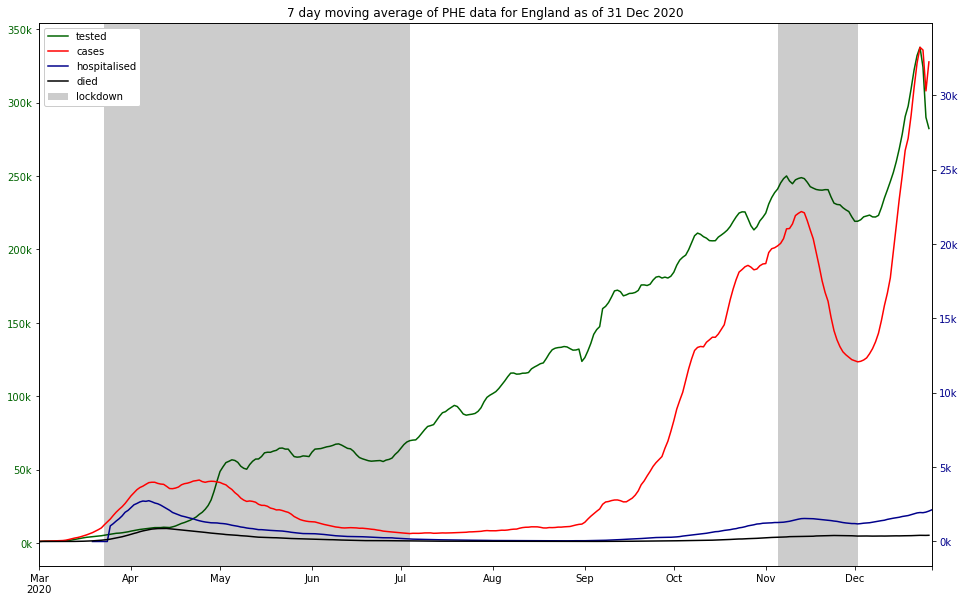

In [15]:
plot_summary(earliest_date='2020-03-01', tested_formatter=lambda y, pos: f"{y / 1_000:,.0f}k")

In [16]:
vaccine_path = download('vaccination', 'nation', first_dose, second_dose, first_dose_cum, second_dose_cum, release=release)
vaccine_path

PosixPath('/Users/chris/coronavirus/data/vaccination_2020-12-31.csv')

In [17]:
read_csv(vaccine_path)

,date,areaType,areaCode,areaName,newPeopleReceivingFirstDose,newPeopleReceivingSecondDose,cumPeopleReceivingFirstDose,cumPeopleReceivingSecondDose
0,2020-12-27,nation,E92000001,England,243039,0,786000,0
1,2020-12-20,nation,E92000001,England,542961,0,542961,0
2,2020-12-27,nation,N92000002,Northern Ireland,14948,0,31016,0
3,2020-12-20,nation,N92000002,Northern Ireland,12445,0,16068,0
4,2020-12-13,nation,N92000002,Northern Ireland,3623,0,3623,0
5,2020-12-27,nation,W92000004,Wales,12055,0,35335,0
6,2020-12-20,nation,W92000004,Wales,15137,0,23280,0
7,2020-12-13,nation,W92000004,Wales,8143,0,8143,0
8,2020-12-27,nation,S92000003,Scotland,33381,0,92188,0
9,2020-12-20,nation,S92000003,Scotland,39675,0,58807,0


In [18]:
download(nation, nation, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/nation_2020-12-31.csv')

In [19]:
download(region, region, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/region_2020-12-31.csv')

In [20]:
download(ltla, ltla, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/ltla_2020-12-31.csv')

In [21]:
download(msoa, msoa, new_cases_sum, new_cases_rate, new_cases_change, release=release)

PosixPath('/Users/chris/coronavirus/data/msoa_2020-12-31.csv')